## 5 workflow patterns

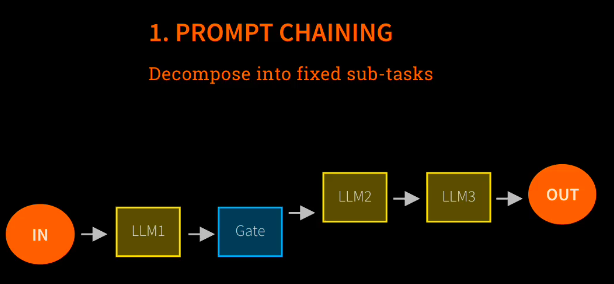

You are chaining a series of LM calls decomposing into a fixed set of subtasks. <br>
And the reason you might want to do that is because you can take care to frame each LM call very precisely to get the the best, the most effective LM response based on that prompt. So it allows you to to really work on each of those tasks being very effective.

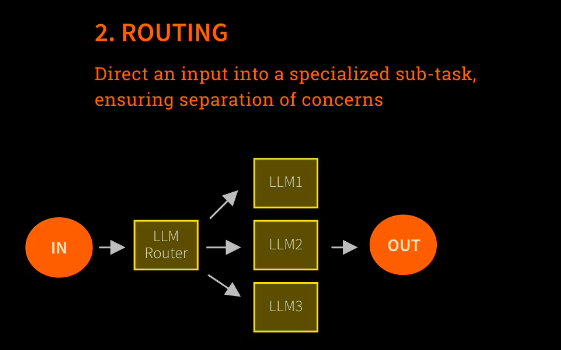


the idea is that you might have specialist models in here. They're shown by LLM one, two and three. And they're each good at different tasks. And the router's job is to classify the task, understand which of the specialists will be best equipped to tackle this task. And it allows for, as I say here, separation of concerns for being able to have different LMS that have different levels of expertise and have them and have an LLM decide how to route to those experts.

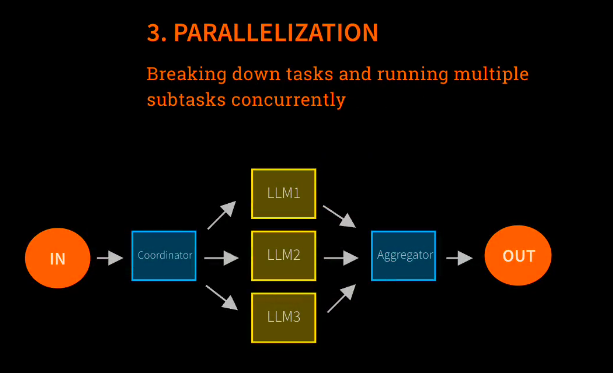

Parallelization might, at first glance, seem similar to the design pattern we just discussed. In fact, they share a lot in common—but the key difference lies in who is doing the coordination.

In this pattern, it isn’t the LLM that’s routing tasks. Instead, the coordination is handled by code—say, Python—that takes a task, breaks it down into multiple subtasks, and sends them out to run in parallel. Each subtask is assigned to a different LLM, which works on its piece concurrently.

Once the LLMs finish, additional code takes their outputs and stitches them back together into a unified result.

Remember: the blue boxes represent code (not an LLM), orchestrating the process of dividing, dispatching, and recombining tasks.

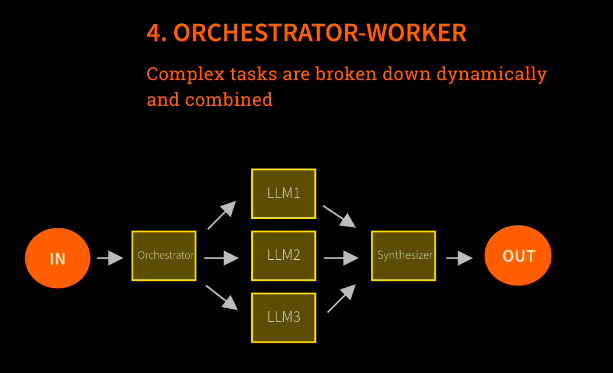

This pattern comes into play when a difficult, complex task needs to be broken down and then recombined.

Now, you might be thinking: Wait—didn’t we just see this? Aren’t these two patterns basically the same? And at first glance, they do look very similar. The difference is subtle—reflected in both the terminology and even the slide colors.

The key distinction is who does the orchestration. In the previous pattern, code handled the splitting and stitching. Here, it’s the LLM itself. The model decides how to break down the task into smaller parts, assigns those subtasks, and then synthesizes the results into a final output.

This creates a more dynamic system, since the orchestrator—the LLM—can flexibly determine how to divide the work. Of course, it still has more constraints than the fully flexible agent flows we’ll look at later.

In short:

- The LLM breaks down the task.
- LLMs act as workers, tackling the subtasks.
- The LLM then recombines the results and synthesize the final answer.

That’s the orchestrator–worker pattern, with the LLM itself directing the workflow.

### generator-evaluator

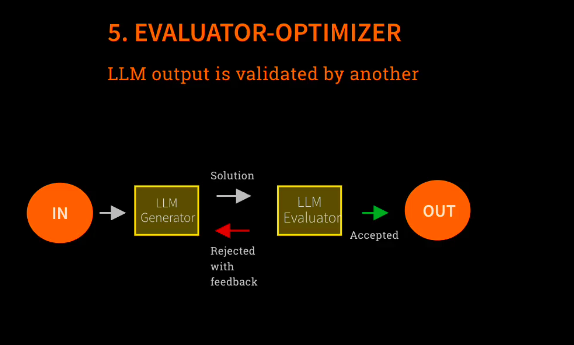


hese are often called evaluators or validation agents—you’ll hear both terms used. The idea is straightforward.

You start with an LLM that’s doing the main task—let’s call it the generator. It produces a solution, represented here by the white arrow. Then, a second LLM acts as the evaluator. Its role isn’t to generate new content, but to check the work of the generator.

The evaluator is given all the necessary information and context so it can make a judgment:

If the work is acceptable, it passes through to the output.

If the work is rejected, the evaluator provides a reason. That feedback loops back to the generator, which can then revise its solution and resubmit it.

This creates a feedback loop between the generator and evaluator, which can continue until an acceptable solution emerges.

Why is this powerful? In production LLM systems, key concerns include accuracy, predictability, and robustness. By introducing evaluators—or more broadly, these evaluator–optimizer flows—you add an additional layer of assurance. They significantly improve accuracy and give stronger guarantees about the quality of outputs.